<a href="https://colab.research.google.com/github/papagorgio23/Northwestern/blob/master/422%20-%20Practical%20Machine%20Learning/Week%201/Discussion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# set working directory
import os
os.chdir("/content/drive/My Drive/422 - Practical Machine Learning/Colab Notebooks/")
os.getcwd()

'/content/drive/My Drive/422 - Practical Machine Learning/Colab Notebooks'

In [0]:
#Call Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#titanic = pd.read_csv('titanic_data.csv')
url = 'https://raw.githubusercontent.com/cfb2/Machine-Learning/master/train.csv'
titanic = pd.read_csv(url)

In [0]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
#view descriptive statistics and first 5 rows
for column in titanic:
    print(titanic[column].describe())
    print(titanic[column].head())

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64
0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64
count                    891
unique                   891
top       Jonkoff, Mr. Lalio
freq                       1
Name: Name, dtype: object
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Flo

In [0]:
#view counts for Survived
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0, 0.5, 'Percent of Survivors')

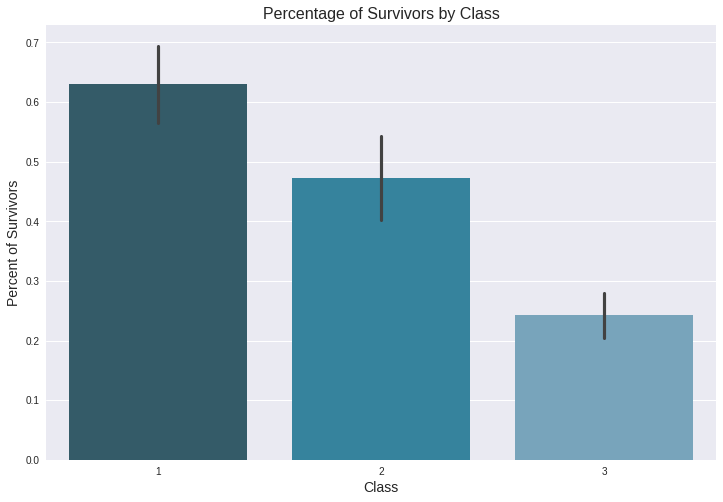

In [0]:
plt.figure(figsize=(12,8))
sns.barplot('Pclass', 'Survived', data=titanic, palette='PuBuGn_d')
plt.title('Percentage of Survivors by Class', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Percent of Survivors', fontsize=14)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0, 0.5, 'Average Class')

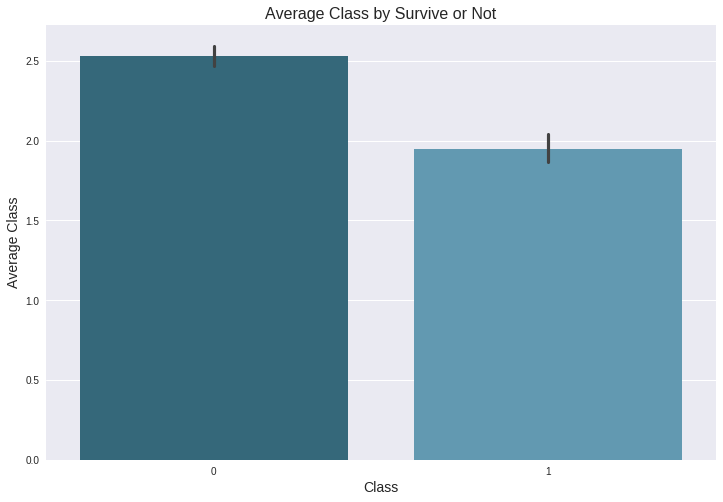

In [0]:
plt.figure(figsize=(12,8))
sns.barplot('Survived', 'Pclass', data=titanic, palette='PuBuGn_d')
plt.title('Average Class by Survive or Not', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Average Class', fontsize=14)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


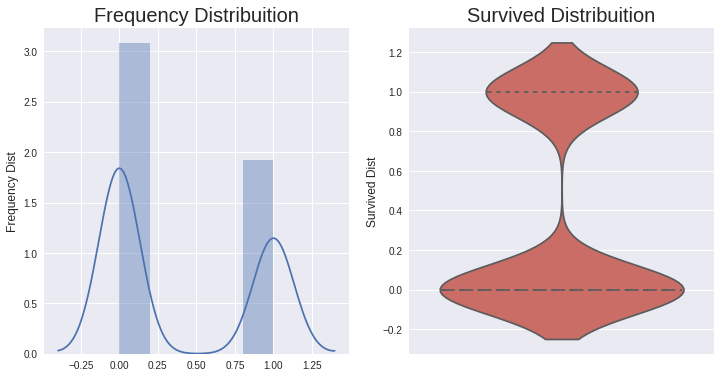

In [0]:
#I will start looking the Survived Distribution
plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.distplot(titanic["Survived"])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)

plt.subplot(122)
g1 = sns.violinplot(y="Survived", data=titanic, 
               inner="quartile", palette="hls")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Survived Dist", fontsize=12)
g1.set_title("Survived Distribuition", fontsize=20)

plt.show()

In [0]:
print(titanic.Parch.value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [0]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


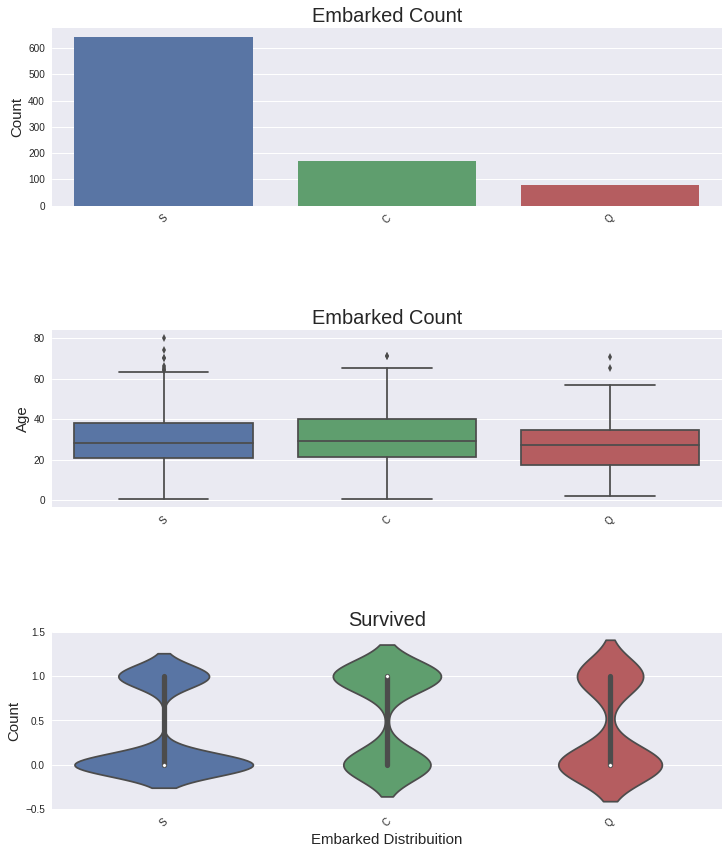

In [0]:
plt.figure(figsize = (12,14))

plt.subplot(311)
g = sns.countplot(x="Embarked", data=titanic)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Embarked Count", fontsize=20)

plt.subplot(312)
g1 = sns.boxplot(x="Embarked", y="Age", data=titanic)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Age", fontsize=15)
g1.set_title("Embarked Count", fontsize=20)

plt.subplot(313)
g2 = sns.violinplot(x="Embarked", y="Survived", data=titanic)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Embarked Distribuition", fontsize=15)
g2.set_ylabel("Count", fontsize=15)
g2.set_title("Survived", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.7,top = 0.9)

plt.show()

In [0]:
#Exploring the counts of catagorical variables
cat_var= ['Parch', 'Embarked', "Sex"]
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(titanic[cat_var[0]], titanic[cat_var[1]]).style.background_gradient(cmap = cm)

Embarked,C,Q,S
Parch,,,
0,123,69,484
1,30,6,82
2,14,1,65
3,1,0,4
4,0,0,4
5,0,1,4
6,0,0,1


In [0]:
pd.crosstab(titanic[cat_var[0]], titanic[cat_var[2]]).style.background_gradient(cmap = cm)

Sex,female,male
Parch,,
0,194,484
1,60,58
2,49,31
3,4,1
4,2,2
5,4,1
6,1,0


In [0]:
pd.crosstab(titanic[cat_var[1]], titanic[cat_var[2]]).style.background_gradient(cmap = cm)

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,203,441


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


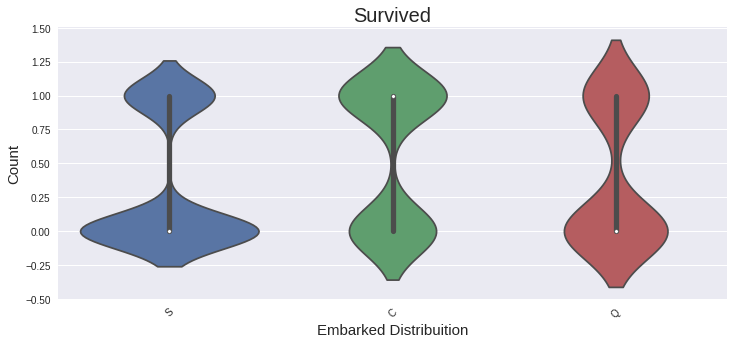

In [0]:
#plt.figure(figsize=(12,8))
#sns.barplot('Survived', 'Pclass', data=titanic, palette='PuBuGn_d')
#plt.title('Average Class by Survive or Not', fontsize=16)
#plt.xlabel('Class', fontsize=14)
#plt.ylabel('Average Class', fontsize=14)


plt.figure(figsize = (12,5))
g2 = sns.violinplot(x="Embarked", y="Survived", data=titanic)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Embarked Distribuition", fontsize=15)
g2.set_ylabel("Count", fontsize=15)
g2.set_title("Survived", fontsize=20)

plt.show()

Text(0.5, 0, 'Passenger Count')

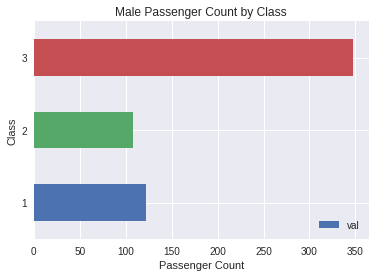

In [0]:
# Horizontal bar charts
df1 = pd.DataFrame({'lab':["1", "2", "3"], 'val':[122, 108, 347]})
ax1 = df1.plot.barh(x='lab', y='val', rot=0)
ax1.set_title('Male Passenger Count by Class')
ax1.set_ylabel('Class')
ax1.set_xlabel('Passenger Count')

Text(0.5, 0, 'Passenger Count')

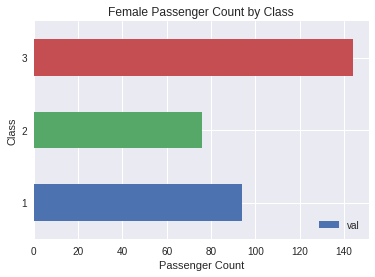

In [0]:
df2 = pd.DataFrame({'lab':["1", "2", "3"], 'val':[94, 76, 144]})
ax2 = df2.plot.barh(x='lab', y='val', rot=0)
ax2.set_title('Female Passenger Count by Class')
ax2.set_ylabel('Class')
ax2.set_xlabel('Passenger Count')

Text(0.5, 0, 'Passenger Count')

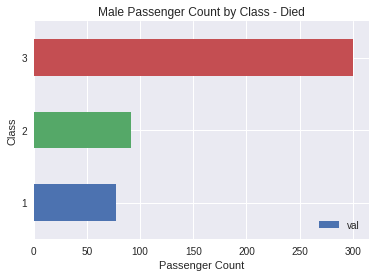

In [0]:
df3 = pd.DataFrame({'lab':["1", "2", "3"], 'val':[77, 91, 300]})
ax3 = df3.plot.barh(x='lab', y='val', rot=0)
ax3.set_title('Male Passenger Count by Class - Died')
ax3.set_ylabel('Class')
ax3.set_xlabel('Passenger Count')

Text(0.5, 0, 'Passenger Count')

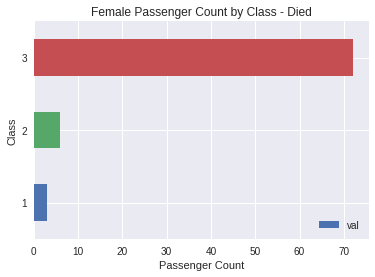

In [0]:
df4 = pd.DataFrame({'lab':["1", "2", "3"], 'val':[3, 6, 72]})
ax4 = df4.plot.barh(x='lab', y='val', rot=0)
ax4.set_title('Female Passenger Count by Class - Died')
ax4.set_ylabel('Class')
ax4.set_xlabel('Passenger Count')

Text(0.5, 0, 'Passenger Age')

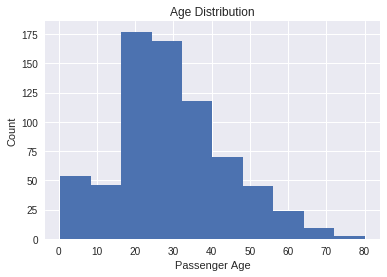

In [0]:
# Histograms
df5 = titanic['Age'].hist()
df5.set_title('Age Distribution')
df5.set_ylabel('Count')
df5.set_xlabel('Passenger Age')

Text(0.5, 0, 'Fare')

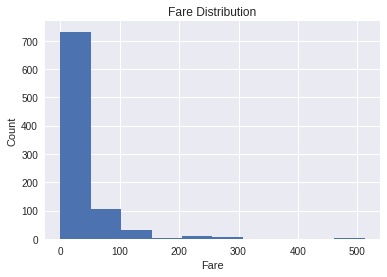

In [0]:
df6 = titanic['Fare'].hist()
df6.set_title('Fare Distribution')
df6.set_ylabel('Count')
df6.set_xlabel('Fare')

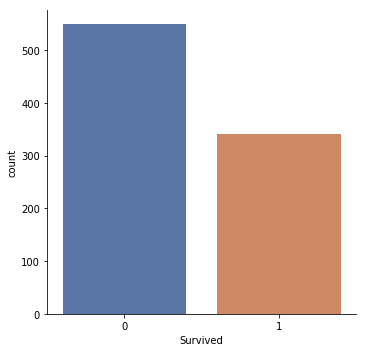

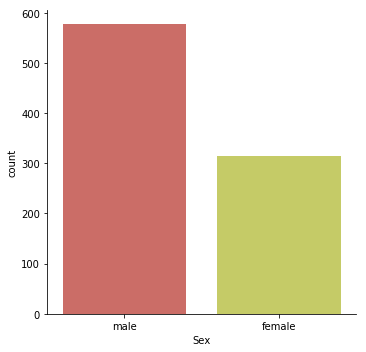

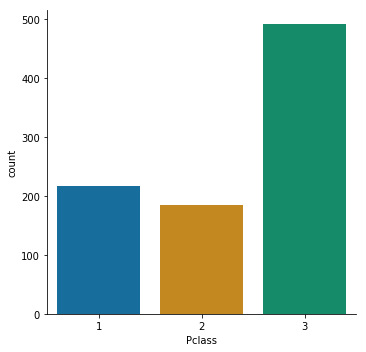

In [0]:
#view barplots for Survived, Pclass and Sex
sns.set_palette('deep')
sns.catplot(x='Survived', kind='count', data=titanic)
sns.set_palette('hls')
sns.catplot(x='Sex', kind='count', data=titanic)
sns.set_palette('colorblind')
sns.catplot(x='Pclass', kind='count', data=titanic)

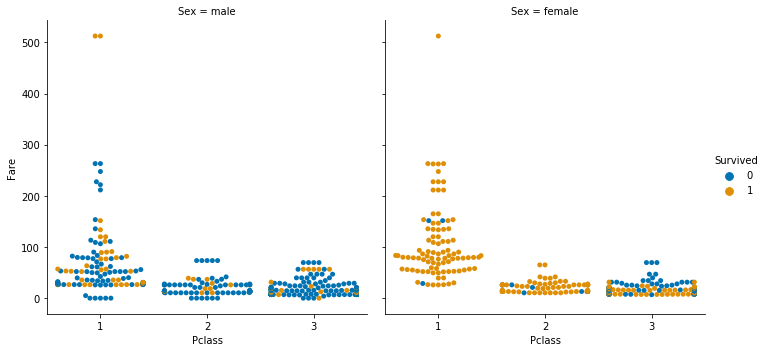

In [0]:
sns.catplot(x="Pclass", y="Fare", hue="Survived", col="Sex", kind='swarm', 
            data=titanic)

Text(0.5, 0, 'Age')

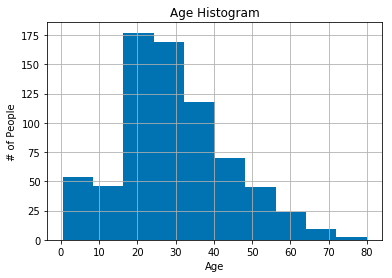

In [0]:
#create histogram of age data to see distribtion
titanic_age_hist = titanic['Age'].hist()
titanic_age_hist.set_title('Age Histogram')
titanic_age_hist.set_ylabel('# of People')
titanic_age_hist.set_xlabel('Age')

Text(0.5, 1.0, 'Age Boxplot')

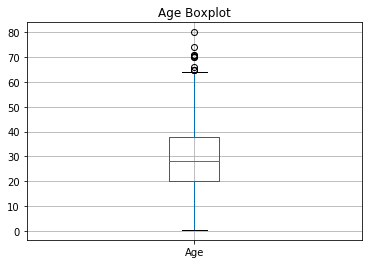

In [0]:
#create age boxplot to look for outliers
titanic_age_boxplot = titanic.boxplot(column = ['Age'])
titanic_age_boxplot.set_title('Age Boxplot')

Text(0.5, 0, 'Fare')

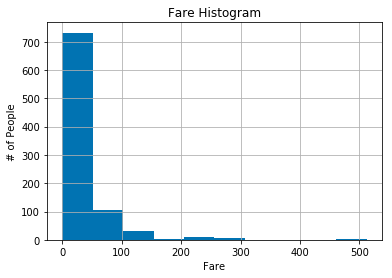

In [0]:
#create histogram of fare data to see distribtion
titanic_fare_hist = titanic['Fare'].hist()
titanic_fare_hist.set_title('Fare Histogram')
titanic_fare_hist.set_ylabel('# of People')
titanic_fare_hist.set_xlabel('Fare')

Text(0.5, 1.0, 'Fare Boxplot')

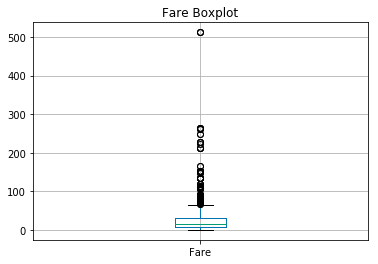

In [0]:
#create fare boxplot to look for outliers
titanic_fare_boxplot = titanic.boxplot(column = ['Fare'])
titanic_fare_boxplot.set_title('Fare Boxplot')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


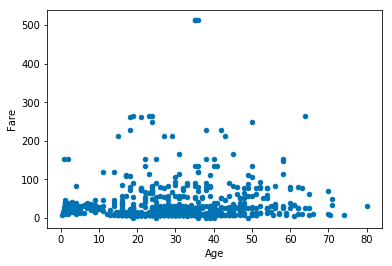

In [0]:
#Is there any relationship between age and fare paid?
titanic.plot.scatter(x = 'Age', y = 'Fare')

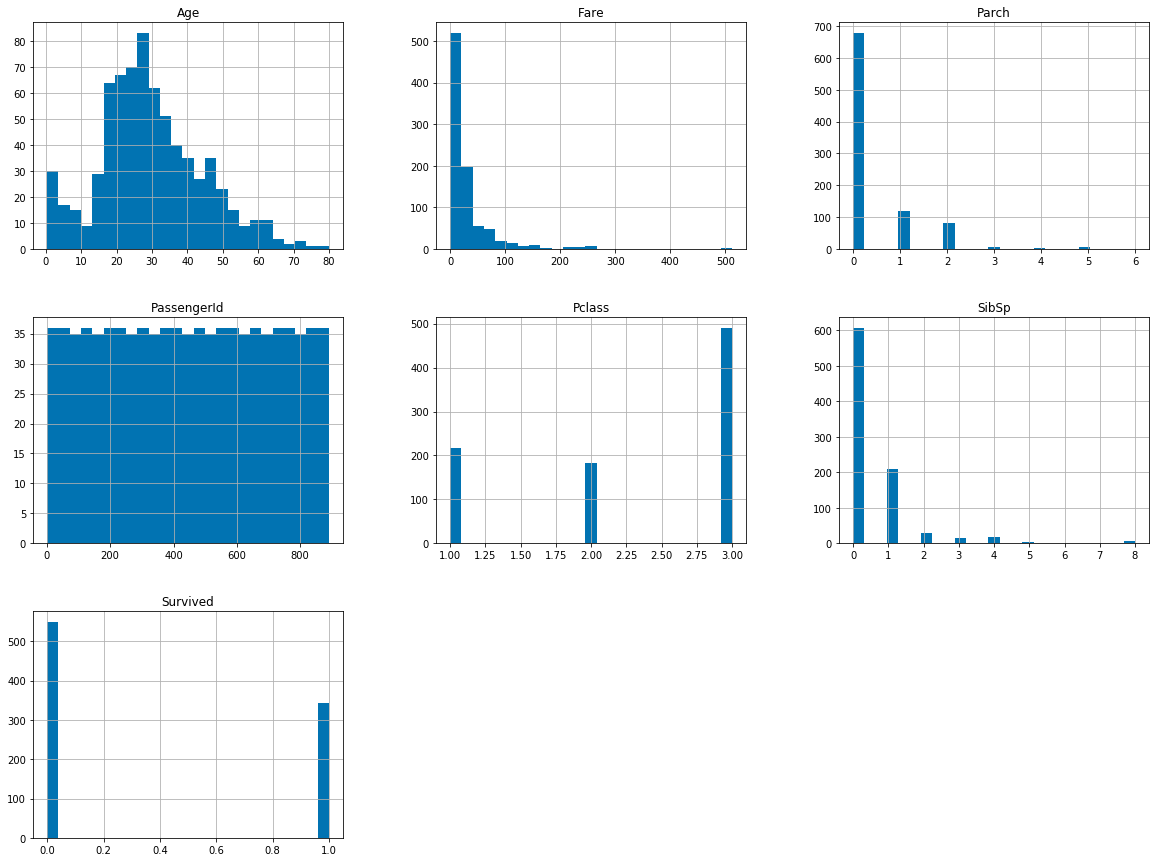

In [0]:
# histograms
titanic.hist(bins=25, figsize=(20,15))
plt.show()

In [0]:
# create groups
g0 = titanic.groupby(["Pclass"]).size()
g0

Pclass
1    216
2    184
3    491
dtype: int64

In [0]:
# create group
g1 = titanic.groupby(["Pclass", "Survived"]).size()
g1

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

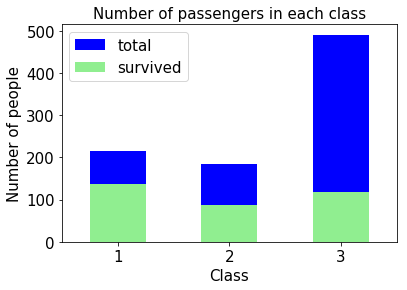

In [0]:
ax = g0.plot(kind='bar', color='blue')
g1.xs(1, level="Survived").plot(kind='bar', color='lightgreen')
plt.title('Number of passengers in each class', size=15)  # plot title
plt.xlabel('Class', size=15)  # lable for x axis
plt.xticks(fontsize=15, rotation=0)
plt.ylabel('Number of people', size=15) # lable for y axis 
plt.yticks(fontsize=15)
ax.legend(("total", "survived"), fontsize=15)
plt.show()

In [0]:
# more groups
g2=titanic.groupby(["Sex"])["Survived"].count()
g2

Sex
female    314
male      577
Name: Survived, dtype: int64

In [0]:
g3=titanic.groupby(["Sex","Survived"])["Survived"].count()
g3

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

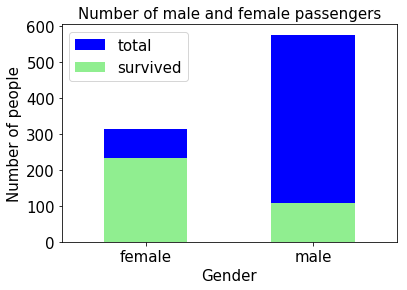

In [0]:
ax=g2.plot(kind="bar", color="blue")
g3.xs(1, level="Survived").plot(kind="bar", color="lightgreen", ax=ax)

plt.title('Number of male and female passengers', size=15)  # plot title
plt.xlabel('Gender', size=15)  # lable for x axis
plt.xticks(fontsize=15, rotation=0)
plt.ylabel('Number of people', size=15) # lable for y axis 
plt.yticks(fontsize=15)
ax.legend(("total", "survived"), fontsize=15)
plt.show()

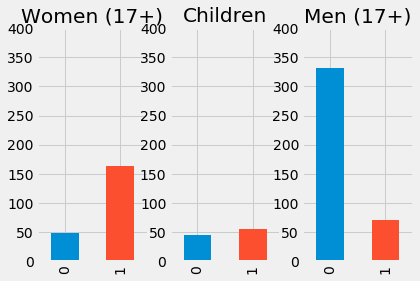

In [0]:
### 538 style
# group by age and gender
kids = titanic[(titanic.Age < 17)]
adults = titanic[(titanic.Age >= 17)]

with plt.style.context('fivethirtyeight'):
  plt.subplot(1, 3, 1)
  adults[(adults.Sex == 'female')].Survived.value_counts(sort = False).plot.bar(title = 'Women (17+)', ylim = (0,400));
  plt.subplot(1, 3, 2)
  kids.Survived.value_counts(sort = False).plot.bar(title = 'Children',ylim = (0,400));
  plt.subplot(1, 3, 3)
  adults[(adults.Sex == 'male')].Survived.value_counts(sort = False).plot.bar(title = 'Men (17+)', ylim = (0,400));

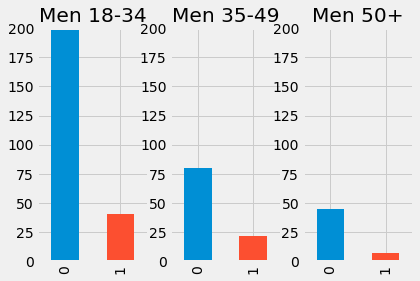

In [0]:
plt.subplot(1, 3, 1)
titanic[(titanic.Sex == 'male') & (titanic.Age > 17) & (titanic.Age <35)].Survived.value_counts(sort = False).plot.bar(title = 'Men 18-34', ylim = (0,200));

plt.subplot(1, 3, 2)
titanic[(titanic.Sex == 'male') & (titanic.Age >= 35) & (titanic.Age < 50)].Survived.value_counts(sort = False).plot.bar(title = 'Men 35-49', ylim = (0,200));

plt.subplot(1, 3, 3)
titanic[(titanic.Sex == 'male') & (titanic.Age >= 50)].Survived.value_counts(sort = False).plot.bar(title = 'Men 50+', ylim = (0,200));

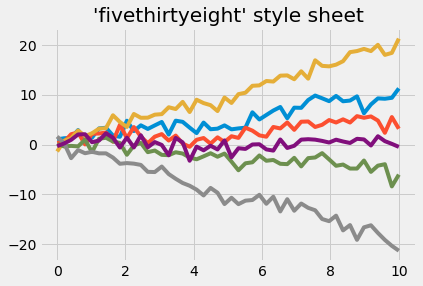

In [0]:
## random side note about 538
# https://matplotlib.org/gallery/style_sheets/fivethirtyeight.html
# https://matplotlib.org/users/style_sheets.html

import matplotlib.pyplot as plt
import numpy as np


plt.style.use('fivethirtyeight')

x = np.linspace(0, 10)

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

ax.plot(x, np.sin(x) + x + np.random.randn(50))
ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + np.random.randn(50))
ax.set_title("'fivethirtyeight' style sheet")

plt.show()

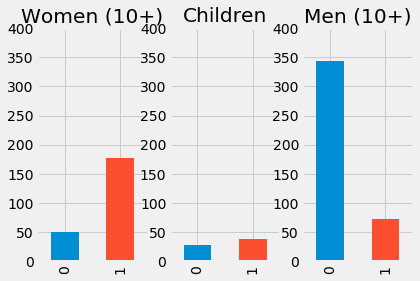

In [0]:
### 538 style
# group by age and gender
kids = titanic[(titanic.Age < 12)]
adults = titanic[(titanic.Age >= 12)]

with plt.style.context('fivethirtyeight'):
  plt.subplot(1, 3, 1)
  adults[(adults.Sex == 'female')].Survived.value_counts(sort = False).plot.bar(title = 'Women (10+)', ylim = (0,400));
  plt.subplot(1, 3, 2)
  kids.Survived.value_counts(sort = False).plot.bar(title = 'Children',ylim = (0,400));
  plt.subplot(1, 3, 3)
  adults[(adults.Sex == 'male')].Survived.value_counts(sort = False).plot.bar(title = 'Men (10+)', ylim = (0,400));

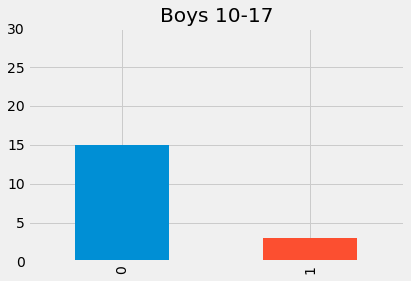

In [0]:
plt.subplot(1,1,1)
titanic[(titanic.Sex == 'male') & (titanic.Age > 10) & (titanic.Age <17)].Survived.value_counts(sort = False).plot.bar(title = 'Boys 10-17', ylim = (0,30));


In [0]:
def survived_ratio(x):
  '''This function is used within pivot_tables to calculate ratios'''
  return np.sum(x) / np.size(x)

In [0]:
pd.pivot_table(titanic, values='Survived', index='Sex',
              aggfunc={'Survived': [np.sum, np.size, survived_ratio]})

,size,sum,survived_ratio
Sex,,,
female,314,233,0.742038
male,577,109,0.188908


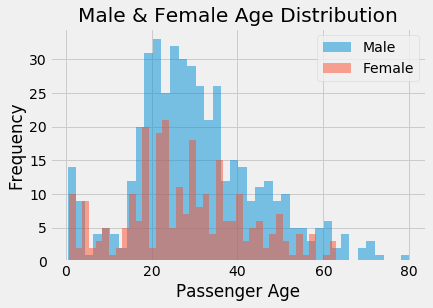

In [0]:
# create arrays for histograms
male_x = titanic[titanic['Sex'] == 'male'].Age.values
female_x = titanic[titanic['Sex'] == 'female'].Age.values

# plot histograms
import warnings
warnings.filterwarnings('ignore')

# kwargs for hist
kwargs = dict(histtype='stepfilled', alpha=0.5, bins=40)

# Age histograms by sex
plt.hist(male_x, **kwargs)
plt.hist(female_x, **kwargs)
plt.title('Male & Female Age Distribution')
plt.xlabel('Passenger Age')
plt.ylabel('Frequency')
plt.legend(['Male', 'Female'])

In [0]:
# survival rate by age
age_piv = pd.pivot_table(titanic, values='Survived', index='Age',
                        aggfunc={'Survived': [np.sum, np.size, survived_ratio]})


In [0]:
# reset index
age_piv = age_piv.reset_index()

Text(0, 0.5, 'Survival Rate')

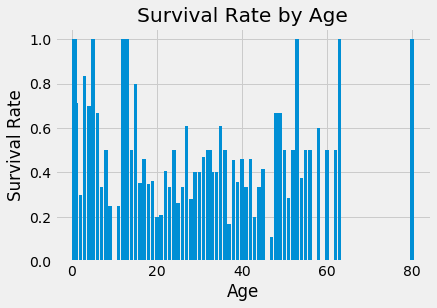

In [0]:
# barplot
plt.bar(age_piv['Age'], age_piv['survived_ratio'])
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')

# Start over...

In [0]:
#import some packages you will be using
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf  
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn import linear_model, metrics
import seaborn as sns

In [43]:
from google.colab import files
uploaded = files.upload()

In [0]:
#titanic = pd.read_csv('titanic_data.csv')
url = 'https://raw.githubusercontent.com/cfb2/Machine-Learning/master/train.csv'
my_data = pd.read_csv(url)

In [45]:
my_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
my_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
# The data consists of 891 observations and 12 variables. 
my_data.shape 

(891, 12)

In [0]:
# convert all variables to lower case for convinience 
my_data.columns = [s.lower() for s in my_data.columns]

In [0]:
# don't care about id
my_data.set_index('passengerid', drop= True, inplace= True)

In [51]:
# no negative values in any column 
my_data [(my_data < 0).all(1)].sum()

survived    0.0
pclass      0.0
name        0.0
sex         0.0
age         0.0
sibsp       0.0
parch       0.0
ticket      0.0
fare        0.0
cabin       0.0
embarked    0.0
dtype: float64

In [50]:
# check for NA's 
my_data.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

Age and Cabin columns have many missing values which is a problem for ML model. Cabin feature has almost 78% observations missing which could be a result of only first class passengers having a cabin. So instead of deleting missing values for age column I would like to extract the titles from the name column and fill the missing values with the median value for respective title.

In [0]:
import string
def substrings_in_string(title, name):
    for title in name:
        if name.find(title) != -1:
            return title
        print (title)
    return np.nan

In [0]:
import string
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if substrings.find(big_string, substring) != -1:
            return substring
    print (big_string)
    return np.nan

In [0]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

In [57]:
my_data['title']=my_data['name'].map(lambda x: substrings_in_string(x, title_list))

def replace_titles(x):
    title=x['title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
my_data['title']=my_data.apply(replace_titles, axis=1)

AttributeError: ignored

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f370ceff860>,
      dtype=object)

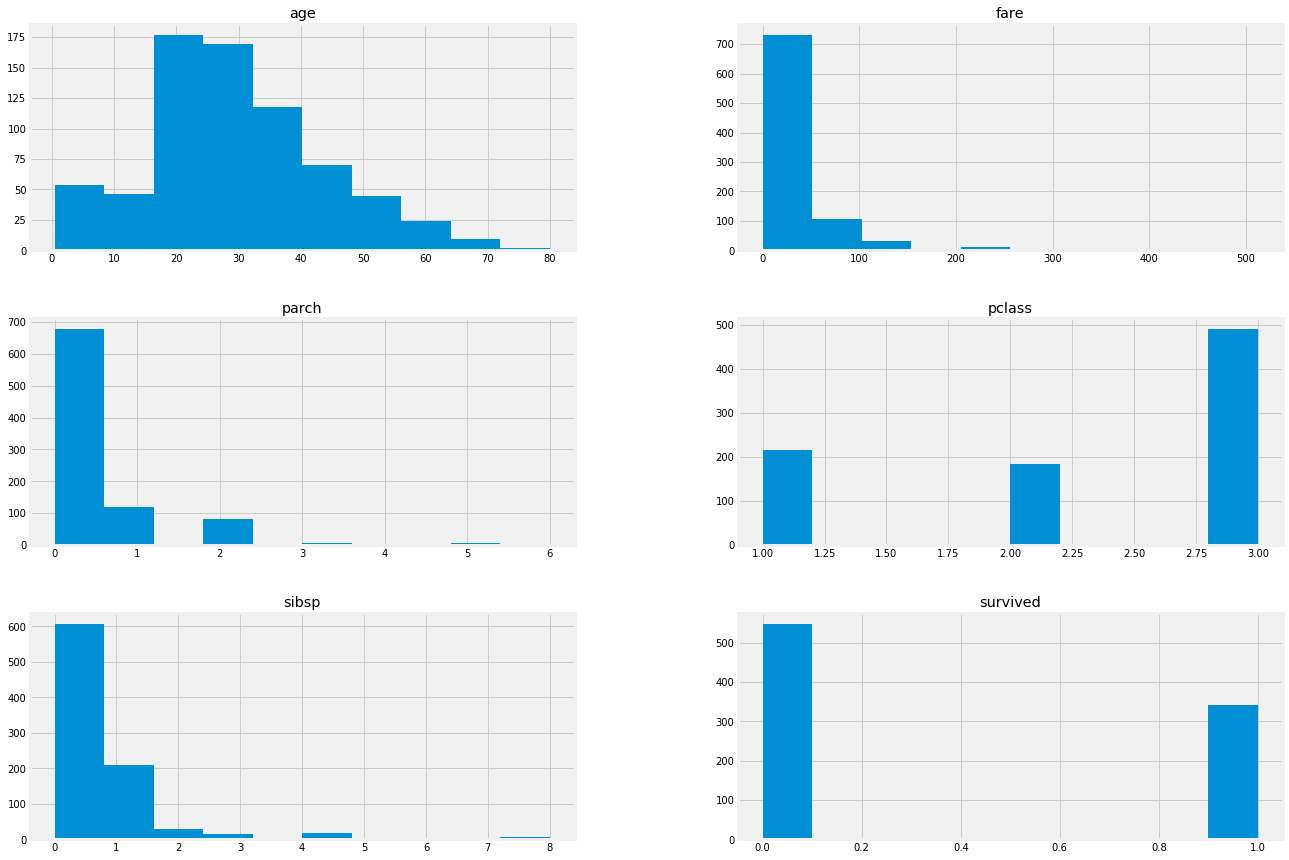

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt 
my_data.loc[:, my_data.columns!= "PassengerId"].hist(figsize= (20,15))

survived        AxesSubplot(0.08,0.749828;0.0820755x0.130172)
pclass      AxesSubplot(0.178491,0.749828;0.0820755x0.130172)
age         AxesSubplot(0.276981,0.749828;0.0820755x0.130172)
sibsp       AxesSubplot(0.375472,0.749828;0.0820755x0.130172)
parch       AxesSubplot(0.473962,0.749828;0.0820755x0.130172)
fare        AxesSubplot(0.572453,0.749828;0.0820755x0.130172)
dtype: object

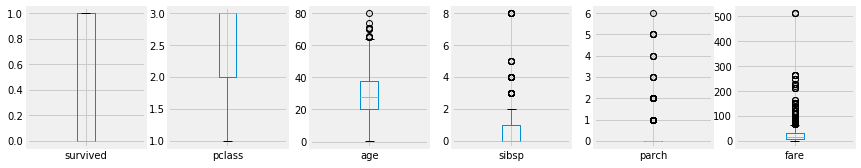

In [59]:
my_data.plot(kind= 'box' , subplots=True, layout=(5,9), sharex=False, sharey=False, figsize=(20,15))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


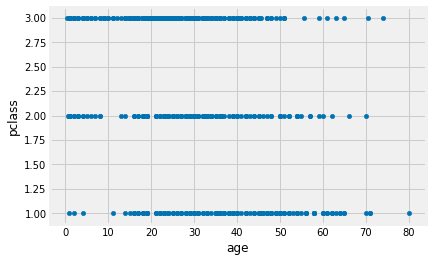

In [60]:
my_data.plot.scatter(y='pclass', x='age', s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
linewidths=None, verts=None, edgecolors=None )

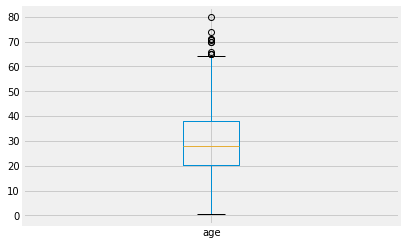

In [61]:
my_data.plot.box(y= 'age', x = 'survived')

# EDA with Seaborn

In [0]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

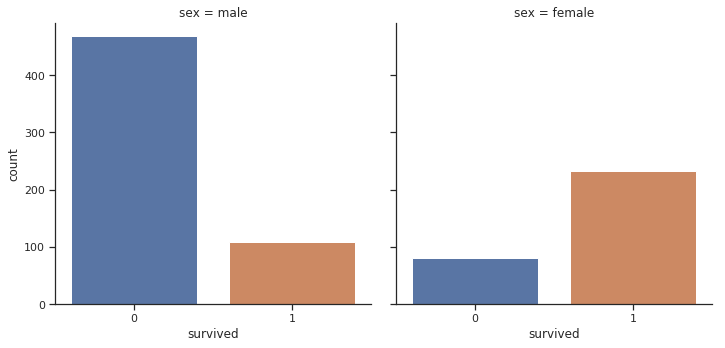

In [63]:
sns.catplot("survived", col="sex", col_wrap=2, data=my_data, kind="count")

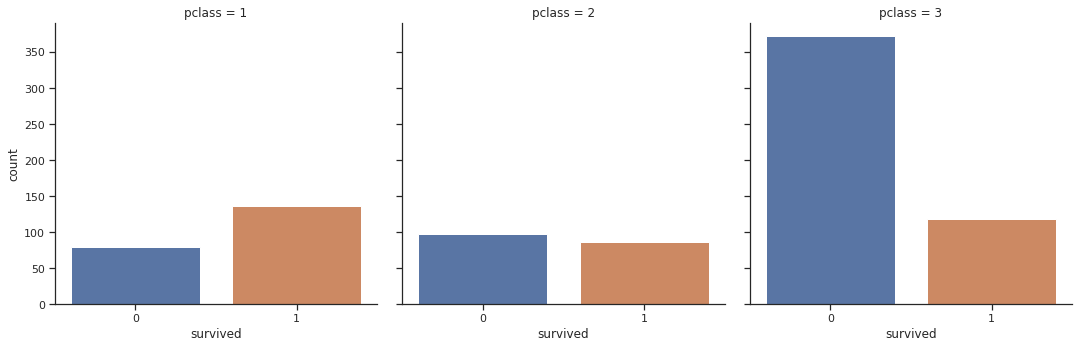

In [64]:
sns.catplot('survived', col= 'pclass', col_wrap= 3, data= my_data, kind = 'count')

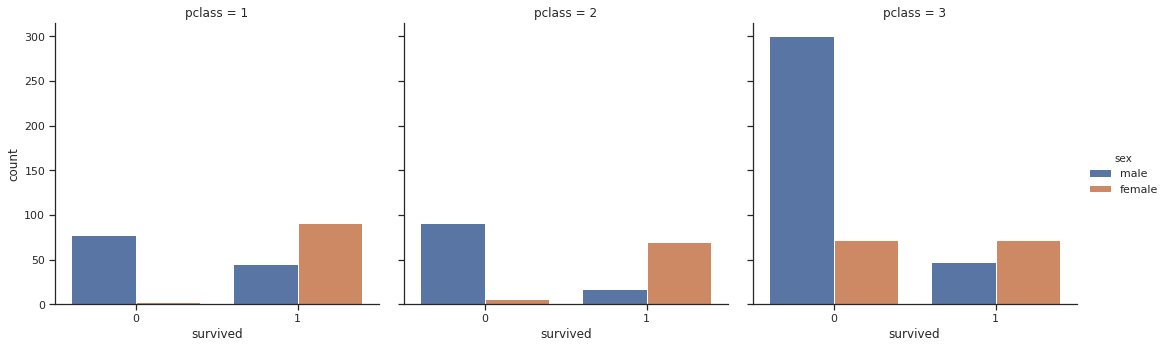

In [65]:
sns.catplot('survived', col= 'pclass', col_wrap= 3, data= my_data, hue= 'sex', kind = 'count')

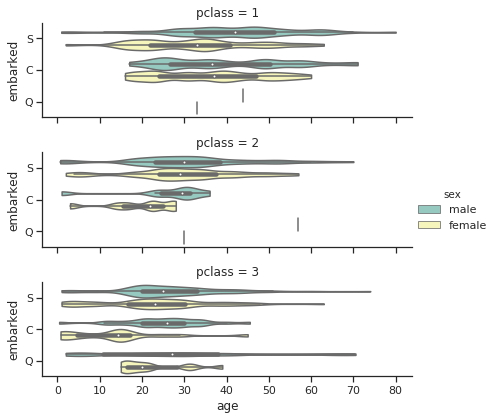

In [66]:
sns.catplot(x="age", y="embarked",
                    hue="sex", row="pclass",
                    data=my_data,
                    orient="h", height=2, aspect=3, palette="Set3",
                    kind="violin", dodge=True, cut=0, bw=.2)

In [0]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='RdPu', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

<Figure size 432x288 with 0 Axes>

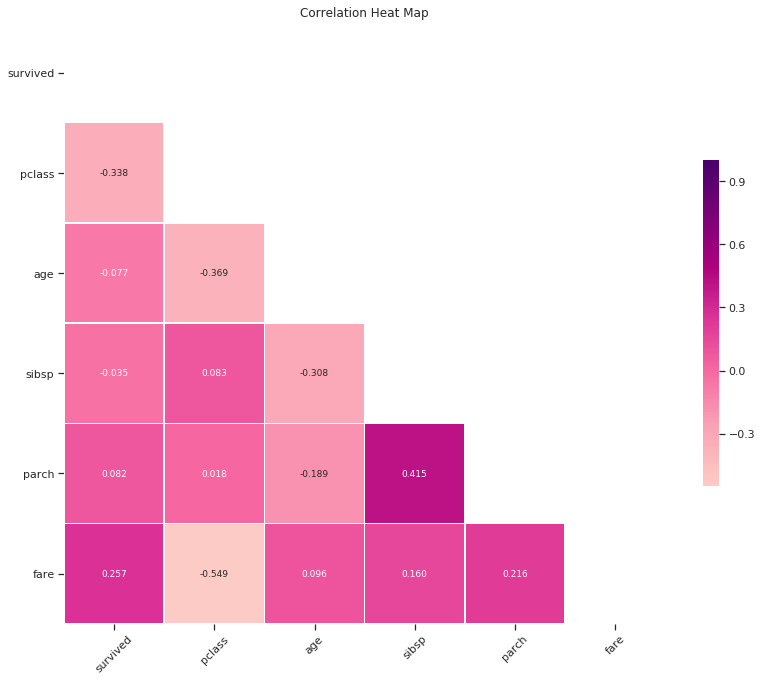

In [72]:
corr_chart(my_data)

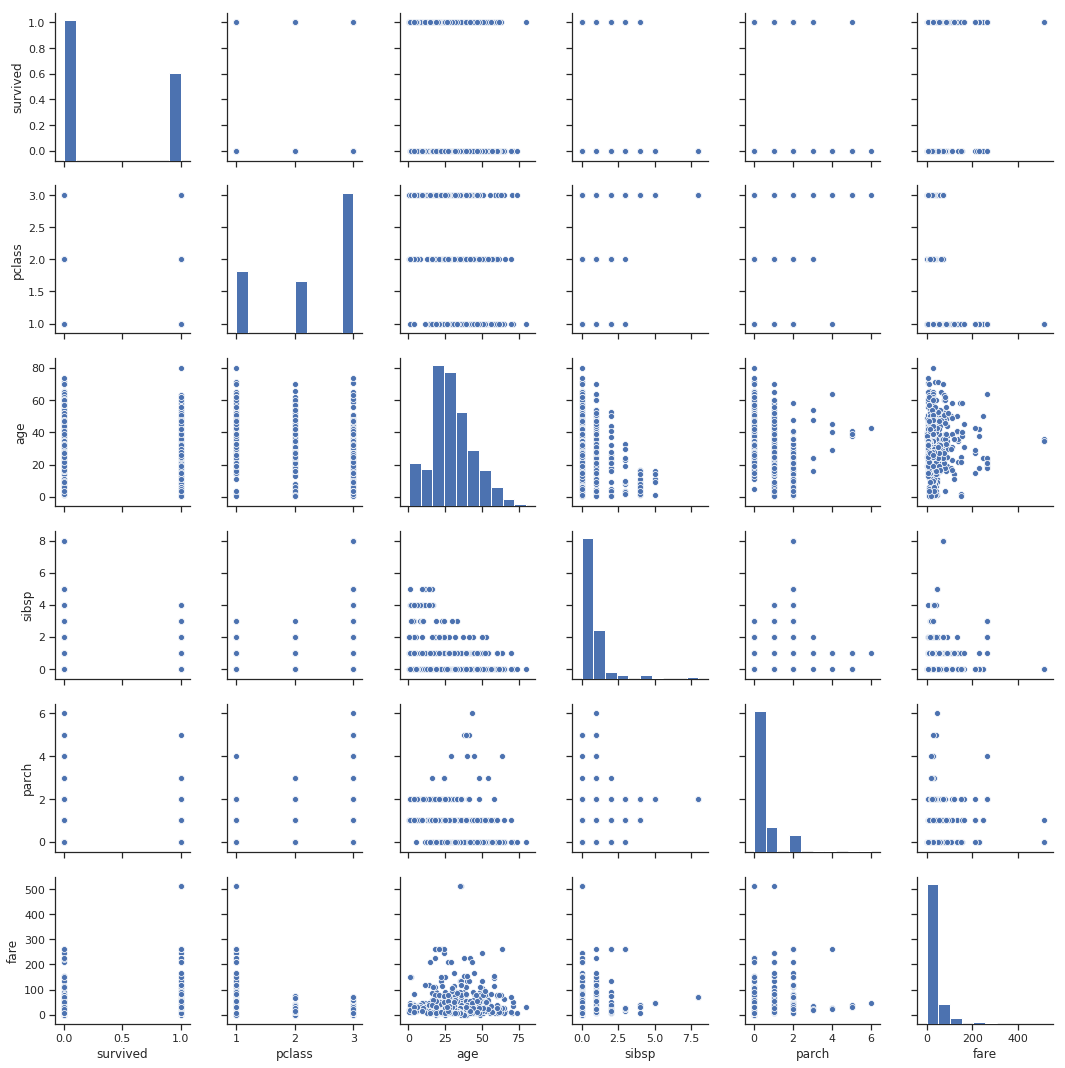

In [74]:
my_data_num = my_data[['survived', 'pclass', 'age', 'sibsp','parch','fare']] 
sns.pairplot(my_data_num)

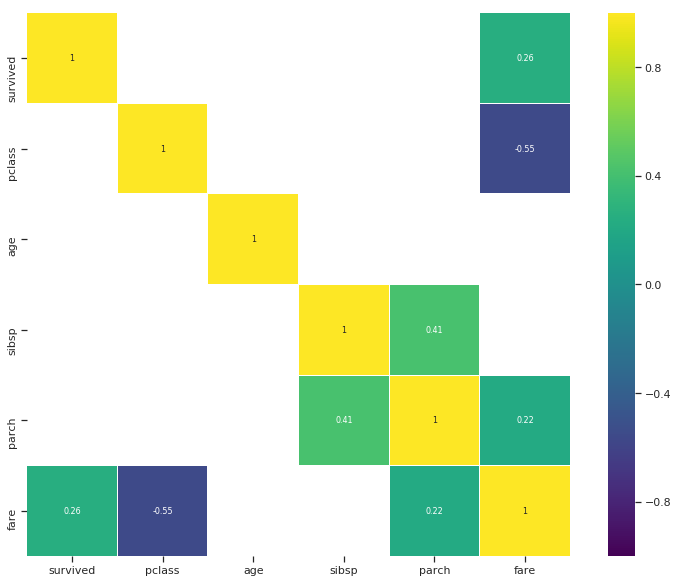

In [75]:
corr = my_data_num.corr() 
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.2) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)